In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version= 1, cache=True)


mnist.target = mnist.target.astype(np.int8)
X = mnist.data
y = mnist.target

from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

In [3]:
import torch

X_train = torch.Tensor(X_train.to_numpy())
X_test = torch.Tensor(X_test.to_numpy())
y_train = torch.LongTensor(y_train.to_numpy())
y_test = torch.LongTensor(y_test.to_numpy())

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

epoch = 10


In [4]:

from torch import nn, optim
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(28*28,30)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(30,10)
        
        
    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x
    

cuda


In [5]:
model = MLP().to(DEVICE)


model_optimizer = torch.optim.Adam(model.parameters())
model_loss = nn.CrossEntropyLoss()



In [6]:

from tqdm import tqdm

def train(model, train_data, epoch, model_optimizer, model_loss):
    loss_history = []
    model.train()
    
    for ep in range(epoch):
        run_loss = 0
        for x_batch, y_batch in tqdm(train_data):
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            outputs = model(x_batch)
            loss = model_loss(outputs, y_batch)
            model_optimizer.zero_grad()
            loss.backward()
            model_optimizer.step()
            run_loss += loss.item()*x_batch.shape[0]
        loss_e = (run_loss/len(train_data.dataset))
        loss_history.append(loss_e)
        print(f"Epoch: {ep+1}, train loss: {round(loss_e,3)}")
        print("-"*50)
        print("\n")
        
    return loss_history
        
    


loss_history = train(model = model, 
                     train_data = loader_train,
                     epoch = epoch,
                     model_optimizer = model_optimizer, 
                     model_loss = model_loss)




100%|███████████████████████████████████████████████████████████████████████████████| 938/938 [00:05<00:00, 179.77it/s]


Epoch: 1, train loss: 0.876
--------------------------------------------------




100%|███████████████████████████████████████████████████████████████████████████████| 938/938 [00:02<00:00, 396.82it/s]


Epoch: 2, train loss: 0.317
--------------------------------------------------




100%|███████████████████████████████████████████████████████████████████████████████| 938/938 [00:02<00:00, 418.23it/s]


Epoch: 3, train loss: 0.258
--------------------------------------------------




100%|███████████████████████████████████████████████████████████████████████████████| 938/938 [00:02<00:00, 394.37it/s]


Epoch: 4, train loss: 0.233
--------------------------------------------------




100%|███████████████████████████████████████████████████████████████████████████████| 938/938 [00:02<00:00, 408.43it/s]


Epoch: 5, train loss: 0.217
--------------------------------------------------




100%|███████████████████████████████████████████████████████████████████████████████| 938/938 [00:02<00:00, 397.58it/s]


Epoch: 6, train loss: 0.214
--------------------------------------------------




100%|███████████████████████████████████████████████████████████████████████████████| 938/938 [00:02<00:00, 406.89it/s]


Epoch: 7, train loss: 0.208
--------------------------------------------------




100%|███████████████████████████████████████████████████████████████████████████████| 938/938 [00:02<00:00, 400.93it/s]


Epoch: 8, train loss: 0.2
--------------------------------------------------




100%|███████████████████████████████████████████████████████████████████████████████| 938/938 [00:02<00:00, 411.36it/s]


Epoch: 9, train loss: 0.195
--------------------------------------------------




100%|███████████████████████████████████████████████████████████████████████████████| 938/938 [00:02<00:00, 410.52it/s]

Epoch: 10, train loss: 0.189
--------------------------------------------------




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


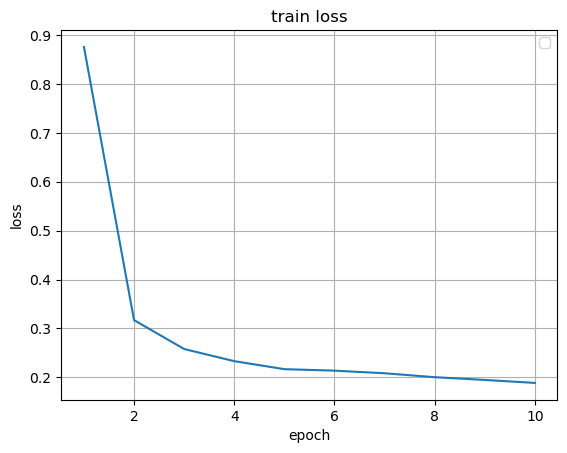

In [7]:
import matplotlib.pyplot as plt
plt.title('train loss')
plt.plot(range(1,epoch+1), loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.show()

 

In [8]:
def Test(model,test_data):
    NoTes = len(test_data.dataset)
    model.eval()
    with torch.no_grad():
        rcorrect = 0
        for x_batch, y_batch in test_data:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            outputs = model(x_batch)
            # accuracy
            pred = outputs.argmax(dim=1)
            corrects_b = torch.sum(pred == y_batch).item()
            rcorrect += corrects_b
        test_acc = rcorrect/NoTes * 100
    print(f"Test accuracy: {rcorrect}/{NoTes} ({round(test_acc,1)} %)")

    
def count_params(model):
    num=0
    for param in model.parameters():
        if param.requires_grad:
            num+=param.numel()
    print(num)    
    

In [9]:
Test(model, loader_test)
count_params(model)    
    

Test accuracy: 9325/10000 (93.2 %)
23860
